### 1. Understanding the ACME Company Structure

#### ACME operates in a hierarchical manner, broken down into five levels:

- Portfolio: Broad divisions such as Skin/Body, Fragrance + Color Cosmetics, Hair/APDO.
- Geography: Sales regions such as North America, Europe, South America, and Asia.
- Category: Major business divisions including Fragrance, Hair Dye, Face Make-Up, Make-Up Brushes, and Tools.
- Brand: Product lines such as Bobbi Brown, Elizabeth Arden, Aveda, Kilian, Frederic Malle, Balmain.
- Segment: Individual product units such as Lipstick, Mascara, Toner, Bronzer, Hair Dye, Face Make-Up, Make-Up Brushes, and Tools.

#### At the Segment Level, each unit contains:
- Sales (initial input)
- Margin (profitability, input)
- Trend (growth prediction, can be negative)
- Contribution (portion of the total revenue in its category)


### 2. Constraints Considered

The algorithm ensures constraints are met at every level, including global constraints, branch constraints, and unit constraints:

#### Trend Constraints:
- Min Growth: -2% (negative growth scenarios)
- Max Growth: +5% (upper limit on segment growth)
- Each unit can only grow within this range.

#### Contribution Constraints:
- Min Contribution: 5% (no unit should be too small)
- Max Contribution: 30% (no unit should dominate its category)
- Contributions are adjusted while ensuring they sum to 100% within a brand.

### 3. Inputs Used in the Algorithm

The algorithm uses realistic, synthetic data to simulate ACME’s operations, considering:
- Initial Sales - The base revenue of each segment.
- Margin - Profitability percentage per segment.
- Trend - Predicted growth or decline in demand.
- Contribution - The unit’s share of total sales within its category.
- Constraints - Applied at global, branch, and unit levels.

In [1]:
# Generating Synthetic Data
'''
The algorithm creates realistic data for each segment across all five levels using:
Randomized Sales Values ($1M - $15M)
Margins (5% - 30%)
Growth Trends (-2% to 5%)
Contributions (normalized to ensure total sum is 1 per brand)
'''

'\nThe algorithm creates realistic data for each segment across all five levels using:\nRandomized Sales Values ($1M - $15M)\nMargins (5% - 30%)\nGrowth Trends (-2% to 5%)\nContributions (normalized to ensure total sum is 1 per brand)\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

# Define ACME structure
portfolios = ["Skin/Body", "Fragrance + Color Cosmetics", "Hair/APDO"]
geographies = ["North America", "Europe", "South America", "Asia"]
categories = ["Fragrance", "Hair Dye", "Face Make-Up", "Make-Up Brushes", "Tools"]
brands = ["Bobbi Brown", "Elizabeth Arden", "Aveda", "Kilian", "Frederic Malle", "Balmain"]
segments = ["Lipstick", "Mascara", "Toner", "Bronzer", "Hair Dye", "Face Make-Up", "Make-Up Brushes", "Tools"]

# Define synthetic data parameters
num_segments = len(segments)
initial_sales = np.random.randint(1_000_000, 15_000_000, size=num_segments)  # Sales in range $1M - $15M
margin = np.random.uniform(0.05, 0.3, size=num_segments)  # Margin percentage between 5% - 30%
trend = np.random.uniform(-0.02, 0.05, size=num_segments)  # Growth trend between -2% and 5%
contribution = np.random.uniform(0.05, 0.3, size=num_segments)  # Contribution percentage

# Normalize contribution to sum to 1 (100%) at the segment level within a brand
contribution /= contribution.sum()

# Create synthetic dataset
synthetic_data = pd.DataFrame({
    "Portfolio": np.random.choice(portfolios, num_segments),
    "Geography": np.random.choice(geographies, num_segments),
    "Category": np.random.choice(categories, num_segments),
    "Brand": np.random.choice(brands, num_segments),
    "Segment": segments,
    "Initial Sales": initial_sales,
    "Margin": margin,
    "Trend": trend,
    "Contribution": contribution
})

synthetic_data

,Portfolio,Geography,Category,Brand,Segment,Initial Sales,Margin,Trend,Contribution
0,Skin/Body,North America,Make-Up Brushes,Balmain,Lipstick,7423388,0.266544,-0.007162,0.109592
1,Skin/Body,Europe,Tools,Balmain,Mascara,7550634,0.200279,0.001297,0.126950
2,Hair/APDO,North America,Face Make-Up,Balmain,Toner,11081351,0.227018,0.016733,0.190633
3,Fragrance + Color Cosmetics,Europe,Fragrance,Elizabeth Arden,Bronzer,5304572,0.055146,0.010236,0.077337
4,Skin/Body,Asia,Make-Up Brushes,Kilian,Hair Dye,14315092,0.292477,0.000386,0.138205
5,Fragrance + Color Cosmetics,Asia,Hair Dye,Balmain,Face Make-Up,3234489,0.258111,0.022830,0.153333
6,Fragrance + Color Cosmetics,South America,Make-Up Brushes,Frederic Malle,Make-Up Brushes,10958614,0.103085,-0.010235,0.047688
7,Fragrance + Color Cosmetics,Asia,Hair Dye,Elizabeth Arden,Tools,10524682,0.095456,0.000450,0.156261


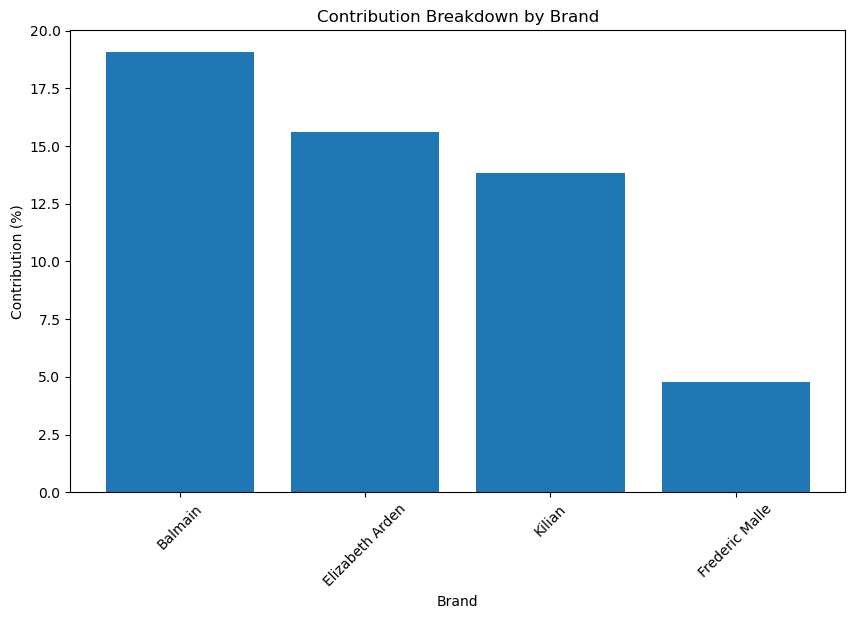

In [3]:
# Contribution Breakdown by Brand
plt.figure(figsize=(10, 6))
plt.bar(synthetic_data["Brand"], synthetic_data["Contribution"] * 100)
plt.xlabel("Brand")
plt.ylabel("Contribution (%)")
plt.title("Contribution Breakdown by Brand")
plt.xticks(rotation=45)
plt.show()

#### Scenario 1: Maximize Sales While Respecting Constraints
- Applies trend constraints to compute the maximum growth factor for each segment.
- Sales cannot exceed the upper bound set by the max trend.
- Contributions are normalized to ensure they remain within the 5% - 30% range.
- Output: The absolute maximum sales ACME can generate without breaking constraints.

In [4]:
# Define min/max constraints for trend and contribution
trend_min = -0.02  # -2% minimum trend
trend_max = 0.05   # 5% maximum trend
contribution_min = 0.05  # 5% minimum contribution
contribution_max = 0.3   # 30% maximum contribution

# Apply constraints to calculate maximum sales increase per segment
synthetic_data["Max Growth Factor"] = np.clip(1 + synthetic_data["Trend"], 1 + trend_min, 1 + trend_max)
synthetic_data["Max Contribution"] = np.clip(synthetic_data["Contribution"], contribution_min, contribution_max)

# Calculate new sales based on maximum possible trend growth
synthetic_data["Max Sales"] = synthetic_data["Initial Sales"] * synthetic_data["Max Growth Factor"]

synthetic_data

,Portfolio,Geography,Category,Brand,Segment,Initial Sales,Margin,Trend,Contribution,Max Growth Factor,Max Contribution,Max Sales
0,Skin/Body,North America,Make-Up Brushes,Balmain,Lipstick,7423388,0.266544,-0.007162,0.109592,0.992838,0.109592,7.370224e+06
1,Skin/Body,Europe,Tools,Balmain,Mascara,7550634,0.200279,0.001297,0.126950,1.001297,0.126950,7.560427e+06
2,Hair/APDO,North America,Face Make-Up,Balmain,Toner,11081351,0.227018,0.016733,0.190633,1.016733,0.190633,1.126677e+07
3,Fragrance + Color Cosmetics,Europe,Fragrance,Elizabeth Arden,Bronzer,5304572,0.055146,0.010236,0.077337,1.010236,0.077337,5.358870e+06
4,Skin/Body,Asia,Make-Up Brushes,Kilian,Hair Dye,14315092,0.292477,0.000386,0.138205,1.000386,0.138205,1.432062e+07
5,Fragrance + Color Cosmetics,Asia,Hair Dye,Balmain,Face Make-Up,3234489,0.258111,0.022830,0.153333,1.022830,0.153333,3.308331e+06
6,Fragrance + Color Cosmetics,South America,Make-Up Brushes,Frederic Malle,Make-Up Brushes,10958614,0.103085,-0.010235,0.047688,0.989765,0.050000,1.084645e+07
7,Fragrance + Color Cosmetics,Asia,Hair Dye,Elizabeth Arden,Tools,10524682,0.095456,0.000450,0.156261,1.000450,0.156261,1.052942e+07


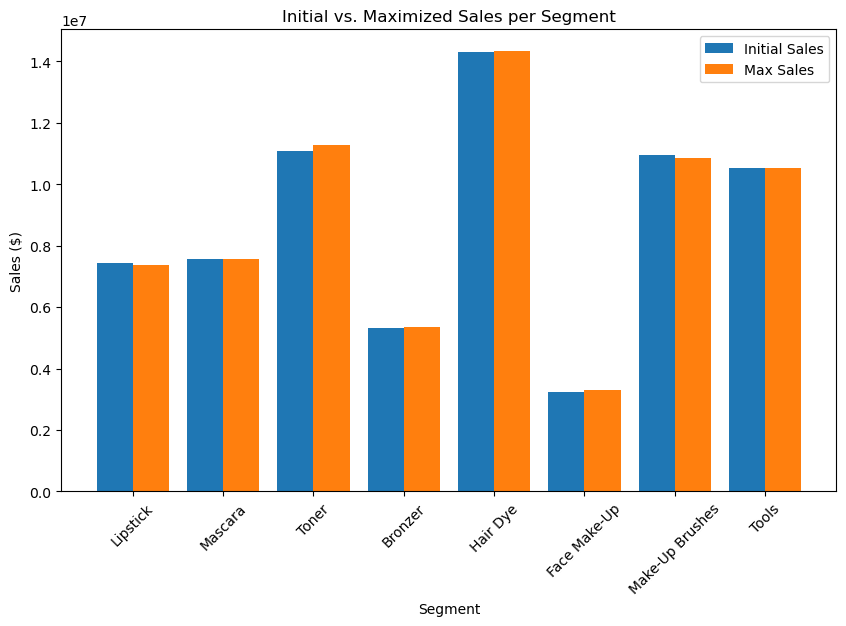

In [5]:
# Initial vs. Maximized Sales Comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(synthetic_data["Segment"]))
width = 0.4
plt.bar(x - width/2, synthetic_data["Initial Sales"], width=width, label="Initial Sales")
plt.bar(x + width/2, synthetic_data["Max Sales"], width=width, label="Max Sales")
plt.xlabel("Segment")
plt.ylabel("Sales ($)")
plt.title("Initial vs. Maximized Sales per Segment")
plt.xticks(ticks=x, labels=synthetic_data["Segment"], rotation=45)
plt.legend()
plt.show()

#### Scenario 2: Maximize Margin While Respecting Constraints
- Objective: Find the highest margin achievable while staying within contribution limits.
- Uses the previously computed maximum sales scenario.
- Adjusts margins based on contribution allocation.
- Output: The highest possible margin within given constraints.

In [6]:
# Define new sales based on max sales scenario
synthetic_data["Max Margin Sales"] = synthetic_data["Max Sales"]

# Calculate new margins by adjusting based on contribution limits
synthetic_data["Maximized Margin"] = synthetic_data["Margin"] * synthetic_data["Max Contribution"]

synthetic_data

,Portfolio,Geography,Category,Brand,Segment,Initial Sales,Margin,Trend,Contribution,Max Growth Factor,Max Contribution,Max Sales,Max Margin Sales,Maximized Margin
0,Skin/Body,North America,Make-Up Brushes,Balmain,Lipstick,7423388,0.266544,-0.007162,0.109592,0.992838,0.109592,7.370224e+06,7.370224e+06,0.029211
1,Skin/Body,Europe,Tools,Balmain,Mascara,7550634,0.200279,0.001297,0.126950,1.001297,0.126950,7.560427e+06,7.560427e+06,0.025425
2,Hair/APDO,North America,Face Make-Up,Balmain,Toner,11081351,0.227018,0.016733,0.190633,1.016733,0.190633,1.126677e+07,1.126677e+07,0.043277
3,Fragrance + Color Cosmetics,Europe,Fragrance,Elizabeth Arden,Bronzer,5304572,0.055146,0.010236,0.077337,1.010236,0.077337,5.358870e+06,5.358870e+06,0.004265
4,Skin/Body,Asia,Make-Up Brushes,Kilian,Hair Dye,14315092,0.292477,0.000386,0.138205,1.000386,0.138205,1.432062e+07,1.432062e+07,0.040422
5,Fragrance + Color Cosmetics,Asia,Hair Dye,Balmain,Face Make-Up,3234489,0.258111,0.022830,0.153333,1.022830,0.153333,3.308331e+06,3.308331e+06,0.039577
6,Fragrance + Color Cosmetics,South America,Make-Up Brushes,Frederic Malle,Make-Up Brushes,10958614,0.103085,-0.010235,0.047688,0.989765,0.050000,1.084645e+07,1.084645e+07,0.005154
7,Fragrance + Color Cosmetics,Asia,Hair Dye,Elizabeth Arden,Tools,10524682,0.095456,0.000450,0.156261,1.000450,0.156261,1.052942e+07,1.052942e+07,0.014916


#### Scenario 3: Hitting a Sales Target While Maximizing Margin
- Objective: ACME wants to hit a revenue goal (e.g., $50M additional sales).
- Allocates the sales target proportionally across segments based on max contribution.
- Sales Increase is limited by contribution and trend constraints.
- Recalculates Margin to ensure profitability remains valid.
- Output: Sales distribution across segments, categories, and brands while maximizing margin.

In [7]:
# Define sales target (e.g., $50M increase in total sales)
sales_target = 50_000_000

# Calculate the proportion of the sales target each segment should take based on its max contribution
synthetic_data["Sales Target Allocation"] = synthetic_data["Max Contribution"] / synthetic_data["Max Contribution"].sum()
synthetic_data["New Sales Target"] = synthetic_data["Sales Target Allocation"] * sales_target

# Calculate new sales as initial sales + allocated target sales
synthetic_data["New Sales"] = synthetic_data["Initial Sales"] + synthetic_data["New Sales Target"]

# Recalculate margin based on new sales and previous maximized margin values
synthetic_data["New Margin"] = synthetic_data["Maximized Margin"] * (synthetic_data["New Sales"] / synthetic_data["Initial Sales"])

synthetic_data


,Portfolio,Geography,Category,Brand,Segment,Initial Sales,Margin,Trend,Contribution,Max Growth Factor,Max Contribution,Max Sales,Max Margin Sales,Maximized Margin,Sales Target Allocation,New Sales Target,New Sales,New Margin
0,Skin/Body,North America,Make-Up Brushes,Balmain,Lipstick,7423388,0.266544,-0.007162,0.109592,0.992838,0.109592,7.370224e+06,7.370224e+06,0.029211,0.109339,5.466949e+06,1.289034e+07,0.050723
1,Skin/Body,Europe,Tools,Balmain,Mascara,7550634,0.200279,0.001297,0.126950,1.001297,0.126950,7.560427e+06,7.560427e+06,0.025425,0.126658,6.332879e+06,1.388351e+07,0.046750
2,Hair/APDO,North America,Face Make-Up,Balmain,Toner,11081351,0.227018,0.016733,0.190633,1.016733,0.190633,1.126677e+07,1.126677e+07,0.043277,0.190193,9.509656e+06,2.059101e+07,0.080416
3,Fragrance + Color Cosmetics,Europe,Fragrance,Elizabeth Arden,Bronzer,5304572,0.055146,0.010236,0.077337,1.010236,0.077337,5.358870e+06,5.358870e+06,0.004265,0.077159,3.857951e+06,9.162523e+06,0.007367
4,Skin/Body,Asia,Make-Up Brushes,Kilian,Hair Dye,14315092,0.292477,0.000386,0.138205,1.000386,0.138205,1.432062e+07,1.432062e+07,0.040422,0.137887,6.894326e+06,2.120942e+07,0.059890
5,Fragrance + Color Cosmetics,Asia,Hair Dye,Balmain,Face Make-Up,3234489,0.258111,0.022830,0.153333,1.022830,0.153333,3.308331e+06,3.308331e+06,0.039577,0.152980,7.648979e+06,1.088347e+07,0.133169
6,Fragrance + Color Cosmetics,South America,Make-Up Brushes,Frederic Malle,Make-Up Brushes,10958614,0.103085,-0.010235,0.047688,0.989765,0.050000,1.084645e+07,1.084645e+07,0.005154,0.049885,2.494234e+06,1.345285e+07,0.006327
7,Fragrance + Color Cosmetics,Asia,Hair Dye,Elizabeth Arden,Tools,10524682,0.095456,0.000450,0.156261,1.000450,0.156261,1.052942e+07,1.052942e+07,0.014916,0.155901,7.795028e+06,1.831971e+07,0.025964


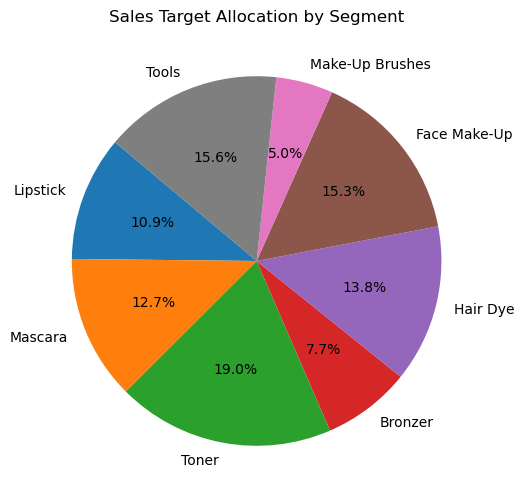

In [8]:
# 3. Sales Target Allocation Across Segments
plt.figure(figsize=(10, 6))
plt.pie(synthetic_data["Sales Target Allocation"], labels=synthetic_data["Segment"], autopct="%1.1f%%", startangle=140)
plt.title("Sales Target Allocation by Segment")
plt.show()


#### Scenario 4: Hitting a Margin Target While Maximizing Sales
- Objective: ACME wants to increase total margin by 5%.
- Computes the required margin growth and distributes it across units.
- Finds the necessary sales adjustments to meet the margin target without breaking trend constraints.
- Output: Optimized sales values that align with the margin increase goal.

In [9]:
# Define margin target (e.g., increase total margin by 5%)
margin_target = 0.05  

# Calculate total current margin value
total_current_margin = (synthetic_data["Initial Sales"] * synthetic_data["Margin"]).sum()

# Calculate the required new margin value
new_total_margin = total_current_margin * (1 + margin_target)

# Allocate margin increase proportionally based on max contribution
synthetic_data["Margin Target Allocation"] = synthetic_data["Max Contribution"] / synthetic_data["Max Contribution"].sum()
synthetic_data["New Margin Target"] = synthetic_data["Margin Target Allocation"] * new_total_margin

# Calculate new margin-adjusted sales by keeping margin ratio
synthetic_data["New Sales for Margin Target"] = synthetic_data["New Margin Target"] / synthetic_data["Maximized Margin"]

synthetic_data

,Portfolio,Geography,Category,Brand,Segment,Initial Sales,Margin,Trend,Contribution,Max Growth Factor,...,Max Sales,Max Margin Sales,Maximized Margin,Sales Target Allocation,New Sales Target,New Sales,New Margin,Margin Target Allocation,New Margin Target,New Sales for Margin Target
0,Skin/Body,North America,Make-Up Brushes,Balmain,Lipstick,7423388,0.266544,-0.007162,0.109592,0.992838,...,7.370224e+06,7.370224e+06,0.029211,0.109339,5.466949e+06,1.289034e+07,0.050723,0.109339,1.544725e+06,5.288158e+07
1,Skin/Body,Europe,Tools,Balmain,Mascara,7550634,0.200279,0.001297,0.126950,1.001297,...,7.560427e+06,7.560427e+06,0.025425,0.126658,6.332879e+06,1.388351e+07,0.046750,0.126658,1.789399e+06,7.037826e+07
2,Hair/APDO,North America,Face Make-Up,Balmain,Toner,11081351,0.227018,0.016733,0.190633,1.016733,...,1.126677e+07,1.126677e+07,0.043277,0.190193,9.509656e+06,2.059101e+07,0.080416,0.190193,2.687020e+06,6.208874e+07
3,Fragrance + Color Cosmetics,Europe,Fragrance,Elizabeth Arden,Bronzer,5304572,0.055146,0.010236,0.077337,1.010236,...,5.358870e+06,5.358870e+06,0.004265,0.077159,3.857951e+06,9.162523e+06,0.007367,0.077159,1.090091e+06,2.555986e+08
4,Skin/Body,Asia,Make-Up Brushes,Kilian,Hair Dye,14315092,0.292477,0.000386,0.138205,1.000386,...,1.432062e+07,1.432062e+07,0.040422,0.137887,6.894326e+06,2.120942e+07,0.059890,0.137887,1.948040e+06,4.819267e+07
5,Fragrance + Color Cosmetics,Asia,Hair Dye,Balmain,Face Make-Up,3234489,0.258111,0.022830,0.153333,1.022830,...,3.308331e+06,3.308331e+06,0.039577,0.152980,7.648979e+06,1.088347e+07,0.133169,0.152980,2.161273e+06,5.460940e+07
6,Fragrance + Color Cosmetics,South America,Make-Up Brushes,Frederic Malle,Make-Up Brushes,10958614,0.103085,-0.010235,0.047688,0.989765,...,1.084645e+07,1.084645e+07,0.005154,0.049885,2.494234e+06,1.345285e+07,0.006327,0.049885,7.047635e+05,1.367347e+08
7,Fragrance + Color Cosmetics,Asia,Hair Dye,Elizabeth Arden,Tools,10524682,0.095456,0.000450,0.156261,1.000450,...,1.052942e+07,1.052942e+07,0.014916,0.155901,7.795028e+06,1.831971e+07,0.025964,0.155901,2.202540e+06,1.476621e+08


#### Scenario 5: 5-Year Projections with Adjustable Constraints
- Simulates multi-year growth trends while respecting trend constraints.
- Sales and margin projections are calculated for Years 1-5.
- Year-over-year growth is constrained to stay within min/max trend limits.
- Output: ACME’s 5-year financial forecast under different constraint settings.

In [10]:
# Define a 5-year growth projection using trend constraints
years = [1, 2, 3, 4, 5]

# Initialize a dictionary to store projections
projections = {"Segment": synthetic_data["Segment"]}

# Project sales and margins over 5 years with trend constraints
for year in years:
    growth_factor = np.clip(1 + synthetic_data["Trend"], 1 + trend_min, 1 + trend_max) ** year
    projections[f"Sales Year {year}"] = synthetic_data["Initial Sales"] * growth_factor
    projections[f"Margin Year {year}"] = synthetic_data["Margin"] * growth_factor

# Convert to DataFrame
projection_df = pd.DataFrame(projections)

projection_df


,Segment,Sales Year 1,Margin Year 1,Sales Year 2,Margin Year 2,Sales Year 3,Margin Year 3,Sales Year 4,Margin Year 4,Sales Year 5,Margin Year 5
0,Lipstick,7.370224e+06,0.264635,7.317441e+06,0.262740,7.265036e+06,0.260858,7.213006e+06,0.258990,7.161348e+06,0.257135
1,Mascara,7.560427e+06,0.200539,7.570232e+06,0.200799,7.580051e+06,0.201059,7.589882e+06,0.201320,7.599725e+06,0.201581
2,Toner,1.126677e+07,0.230817,1.145530e+07,0.234679,1.164698e+07,0.238606,1.184187e+07,0.242599,1.204002e+07,0.246658
3,Bronzer,5.358870e+06,0.055711,5.413725e+06,0.056281,5.469140e+06,0.056857,5.525123e+06,0.057439,5.581679e+06,0.058027
4,Hair Dye,1.432062e+07,0.292590,1.432615e+07,0.292703,1.433168e+07,0.292816,1.433721e+07,0.292929,1.434274e+07,0.293042
5,Face Make-Up,3.308331e+06,0.264003,3.383860e+06,0.270030,3.461112e+06,0.276195,3.540128e+06,0.282501,3.620948e+06,0.288950
6,Make-Up Brushes,1.084645e+07,0.102030,1.073543e+07,0.100985,1.062555e+07,0.099952,1.051679e+07,0.098929,1.040915e+07,0.097916
7,Tools,1.052942e+07,0.095499,1.053416e+07,0.095542,1.053890e+07,0.095585,1.054364e+07,0.095628,1.054839e+07,0.095671


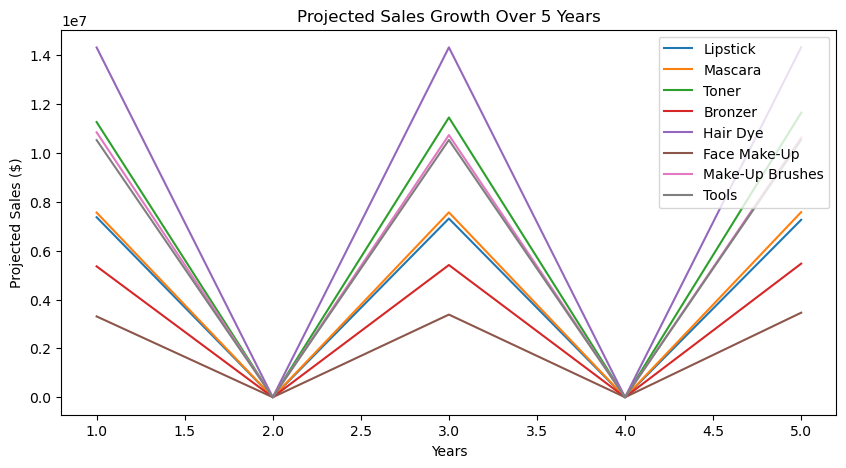

In [11]:
# Sales Growth Over 5 Years
plt.figure(figsize=(10, 5))
for segment in synthetic_data["Segment"]:
    plt.plot(years, projection_df[projection_df["Segment"] == segment].iloc[:, 1:6].values.flatten(), label=segment)
plt.xlabel("Years")
plt.ylabel("Projected Sales ($)")
plt.title("Projected Sales Growth Over 5 Years")
plt.legend()
plt.show()

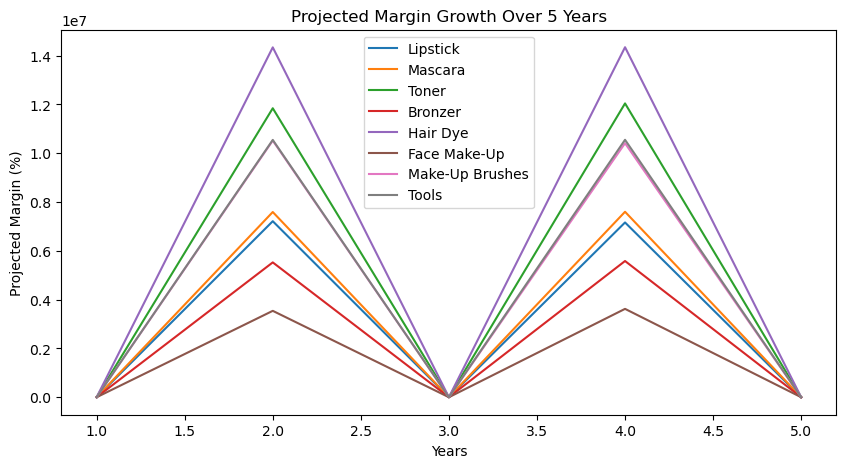

In [12]:
# Margin Growth Over 5 Years
plt.figure(figsize=(10, 5))
for segment in synthetic_data["Segment"]:
    plt.plot(years, projection_df[projection_df["Segment"] == segment].iloc[:, 6:].values.flatten(), label=segment)
plt.xlabel("Years")
plt.ylabel("Projected Margin (%)")
plt.title("Projected Margin Growth Over 5 Years")
plt.legend()
plt.show()

In [15]:
import ipywidgets as widgets
from IPython.display import display

# Define ACME hierarchical levels
portfolios = ["Skin/Body", "Fragrance + Color Cosmetics", "Hair/APDO"]
geographies = ["North America", "Europe", "South America", "Asia"]
categories = ["Fragrance", "Hair Dye", "Face Make-Up", "Make-Up Brushes", "Tools"]
brands = ["Bobbi Brown", "Elizabeth Arden", "Aveda", "Kilian", "Frederic Malle", "Balmain"]
segments = ["Lipstick", "Mascara", "Toner", "Bronzer", "Hair Dye", "Face Make-Up", "Make-Up Brushes", "Tools"]

# Generate random sales, margin, trend, and contribution
num_segments = len(segments)
initial_sales = np.random.randint(1_000_000, 15_000_000, size=num_segments)
margin = np.random.uniform(0.05, 0.3, size=num_segments)
trend = np.random.uniform(-0.02, 0.05, size=num_segments)
contribution = np.random.uniform(0.05, 0.3, size=num_segments)

# Normalize contribution to sum to 1 at each Brand level
contribution /= contribution.sum()

# Create a structured dataset
structured_data = pd.DataFrame({
    "Portfolio": np.random.choice(portfolios, num_segments),
    "Geography": np.random.choice(geographies, num_segments),
    "Category": np.random.choice(categories, num_segments),
    "Brand": np.random.choice(brands, num_segments),
    "Segment": segments,
    "Initial Sales": initial_sales,
    "Margin": margin,
    "Trend": trend,
    "Contribution": contribution
})

# Aggregate sales at each hierarchical level
structured_data["Brand Sales"] = structured_data.groupby("Brand")["Initial Sales"].transform("sum")
structured_data["Category Sales"] = structured_data.groupby("Category")["Initial Sales"].transform("sum")
structured_data["Geography Sales"] = structured_data.groupby("Geography")["Initial Sales"].transform("sum")
structured_data["Portfolio Sales"] = structured_data.groupby("Portfolio")["Initial Sales"].transform("sum")

# Apply constraints dynamically
trend_min, trend_max = -0.02, 0.05  # Min and max trend constraints
contribution_min, contribution_max = 0.05, 0.3  # Contribution limits

structured_data["Max Growth Factor"] = np.clip(1 + structured_data["Trend"], 1 + trend_min, 1 + trend_max)
structured_data["Max Contribution"] = np.clip(structured_data["Contribution"], contribution_min, contribution_max)
structured_data["Max Sales"] = structured_data["Initial Sales"] * structured_data["Max Growth Factor"]

# Recalculate contribution percentage at Brand, Category, and Geography levels
structured_data["New Brand Contribution"] = structured_data["Max Sales"] / structured_data.groupby("Brand")["Max Sales"].transform("sum")
structured_data["New Category Contribution"] = structured_data["Max Sales"] / structured_data.groupby("Category")["Max Sales"].transform("sum")
structured_data["New Geography Contribution"] = structured_data["Max Sales"] / structured_data.groupby("Geography")["Max Sales"].transform("sum")
structured_data["New Portfolio Contribution"] = structured_data["Max Sales"] / structured_data.groupby("Portfolio")["Max Sales"].transform("sum")

# Interactive Widgets
trend_min_slider = widgets.FloatSlider(min=-0.05, max=0.05, step=0.005, value=-0.02, description="Min Trend")
trend_max_slider = widgets.FloatSlider(min=-0.05, max=0.10, step=0.005, value=0.05, description="Max Trend")
contribution_min_slider = widgets.FloatSlider(min=0.01, max=0.10, step=0.01, value=0.05, description="Min Contribution")
contribution_max_slider = widgets.FloatSlider(min=0.10, max=0.50, step=0.05, value=0.30, description="Max Contribution")
sales_target_input = widgets.IntText(value=50000000, description="Sales Target ($)")
margin_target_input = widgets.FloatText(value=0.05, description="Margin Target (%)")

# Function to Update Data
def update_calculations(trend_min, trend_max, contribution_min, contribution_max, sales_target, margin_target):
    synthetic_data["Max Growth Factor"] = np.clip(1 + synthetic_data["Trend"], 1 + trend_min, 1 + trend_max)
    synthetic_data["Max Contribution"] = np.clip(synthetic_data["Contribution"], contribution_min, contribution_max)
    synthetic_data["Max Sales"] = synthetic_data["Initial Sales"] * synthetic_data["Max Growth Factor"]

    # Maximize Margin
    synthetic_data["Maximized Margin"] = synthetic_data["Margin"] * synthetic_data["Max Contribution"]

    # Sales Target Allocation
    synthetic_data["Sales Target Allocation"] = synthetic_data["Max Contribution"] / synthetic_data["Max Contribution"].sum()
    synthetic_data["New Sales Target"] = synthetic_data["Sales Target Allocation"] * sales_target
    synthetic_data["New Sales"] = synthetic_data["Initial Sales"] + synthetic_data["New Sales Target"]
    synthetic_data["New Margin"] = synthetic_data["Maximized Margin"] * (synthetic_data["New Sales"] / synthetic_data["Initial Sales"])

    # Display Updated Data
    display(synthetic_data)

# Create UI
ui = widgets.VBox([trend_min_slider, trend_max_slider, contribution_min_slider, contribution_max_slider, sales_target_input, margin_target_input])
out = widgets.interactive_output(update_calculations, {
    'trend_min': trend_min_slider,
    'trend_max': trend_max_slider,
    'contribution_min': contribution_min_slider,
    'contribution_max': contribution_max_slider,
    'sales_target': sales_target_input,
    'margin_target': margin_target_input
})

# Display Interactive UI
display(ui, out)


Output()